<center> <h1> Selecting the best GAN architecture (tunning parameters)</h1>

<b>Autor:</b> Edwin Rueda <br>
<b>email:</b> ejrueda95g@gmail.com <br>
<b>github:</b> https://github.com/ejrueda <br>
<b>website:</b> http://edwinrueda.com/ <br>
<b> You can cite this work with</b>:

@software{edwin_rueda_2020_3843381,<br>
  author       = {Edwin Rueda},<br>
  title        = {ejrueda/MasterUFPA: zenodo release},<br>
  month        = may,<br>
  year         = 2020,<br>
  publisher    = {Zenodo},<br>
  version      = {zenodo},<br>
  doi          = {10.5281/zenodo.3843381},<br>
  url          = {https://doi.org/10.5281/zenodo.3843381}<br>
}

In [1]:
from utilities import EdwinRueda_utils
import tensorflow as tf
import numpy as np
import pandas as pd
from time import time
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from sklearn.decomposition import PCA
tf.keras.backend.set_floatx('float64')
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, export_svgs
from bokeh.transform import jitter
from bokeh.models import ColumnDataSource
%matplotlib inline
output_notebook()
print("tensorflow version: ", tf.__version__)
print("numpy version: ", np.__version__)
print("matplotlib version: ", matplotlib.__version__)
print("sklearn version: ", sklearn.__version__)

Loading BokehJS ...

tensorflow version:  2.2.0
numpy version:  1.18.1
matplotlib version:  3.1.1
sklearn version:  0.23.2


In [2]:
data = pd.read_csv("../data/all_counts_9_norm_rpkm_log2_preprocessed.csv", index_col=0)
data.head()

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
aaeA,5.542667,5.876225,5.189101,6.178741,6.258982,5.921482,6.565341,6.308676,6.256590
aaeB,5.627977,5.436188,5.397088,5.493631,5.603751,5.716862,5.840627,6.132819,5.896502
aaeR,5.645506,5.758852,5.107190,5.824890,5.487705,6.033795,5.710782,6.302440,16.270368
aaeX,6.081770,6.043589,6.030808,6.358792,15.682419,6.129392,6.042647,6.134309,15.797839
aas,6.224669,6.297153,6.297008,6.047021,6.038410,6.296795,6.295251,6.598525,6.568365


In [3]:
rg = open("../data/reference_genes.txt").read().splitlines()
print(rg)

['cysG', 'hcaT', 'idnT', 'rrsA', 'ihfB', 'ssrA', 'gyrA', 'recA', 'rpoB', 'rpoA', 'gyrB', 'rho', 'ftsZ', 'secA', 'rpoC', 'gmk', 'adk', 'rpoD', 'dnaG', 'glnA', 'recF']


In [4]:
rg_data = data.reindex(rg).dropna()
rg_data

,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,5.903687,5.879490,5.873191,5.735536,6.016590,6.328393,6.315338,6.504277,6.577601
hcaT,5.692781,5.733848,5.686571,5.925712,6.290692,6.131968,6.113390,5.891730,5.822536
rrsA,10.498560,10.775182,11.515848,11.819169,11.745607,11.033925,10.521316,8.685239,10.590185
ihfB,11.625723,11.784312,12.694811,13.119308,13.096534,12.574847,12.140031,10.126885,11.298441
ssrA,12.889916,13.026561,13.839784,14.807551,14.601034,13.858224,14.509441,12.713618,13.816964
gyrA,19.364537,19.544602,10.195372,19.601927,19.576949,18.693722,17.988391,16.700954,17.802523
recA,16.741059,16.808839,17.125494,11.214665,10.997956,10.271486,19.879175,18.190008,19.661178
rpoB,8.974988,19.071784,10.029701,19.552264,19.479836,18.539912,8.439041,16.884159,18.085799
rpoA,12.169900,12.425077,13.123721,12.536993,12.467720,11.604108,11.477677,19.684894,11.166540


In [5]:
scaler = EdwinRueda_utils.scaler(xmin=-1, xmax=1)
scaler.fit(rg_data)
rg_data = scaler.transform(rg_data)
print("Reference genes scaled: ")
rg_data

Reference genes scaled: 


,BB9,BB10,BB17,BB19,BB20,BB21,BB11,BB12,BB18
gene,,,,,,,,,
cysG,-0.969147,-0.978963,-0.973373,-1.000000,-1.000000,-0.970143,-0.970659,-0.911181,-0.890876
hcaT,-1.000000,-1.000000,-1.000000,-0.972570,-0.959573,-1.000000,-1.000000,-1.000000,-1.000000
rrsA,-0.296977,-0.271812,-0.168266,-0.122535,-0.155035,-0.254901,-0.359582,-0.594943,-0.310966
ihfB,-0.132088,-0.126050,-0.000049,0.064988,0.044212,-0.020681,-0.124403,-0.385905,-0.208607
ssrA,0.052847,0.053385,0.163319,0.308490,0.266109,0.174393,0.219843,-0.010831,0.155377
gyrA,1.000000,0.994874,-0.356674,1.000000,1.000000,0.909390,0.725292,0.567331,0.731382
recA,0.616219,0.599711,0.632131,-0.209725,-0.265305,-0.370792,1.000000,0.783242,1.000000
rpoB,-0.519856,0.926579,-0.380312,0.992837,0.985677,0.886011,-0.662111,0.593895,0.772322
rpoA,-0.052482,-0.033495,0.061149,-0.019001,-0.048531,-0.168233,-0.220635,1.000000,-0.227669


### bulding the best GAN architecture

In [6]:
noise_shape = 50
#generator network
G = Sequential()
G.add(Dense(50, input_shape=(noise_shape,)))
G.add(Dense(150))
G.add(Dropout(.15))
G.add(Dense(rg_data.shape[1], activation="tanh"))

#discriminator network
D = Sequential()
D.add(Dense(32, input_shape=(rg_data.shape[1],)))
D.add(tf.keras.layers.LeakyReLU(alpha=.2))
D.add(Dense(32))
D.add(Dense(1, activation="sigmoid"))

In [7]:
noise_vector = tf.random.normal((4, noise_shape), dtype=tf.float64)
print("synthetic samples: ")
synthetic_samples = G(noise_vector)
print(synthetic_samples)
print("----------------------------------------")
print("prediction of the discriminator network")
print("----------------------------------------")
D(synthetic_samples)

synthetic samples: 
tf.Tensor(
[[ 0.86293472 -0.62260519  0.79260224 -0.68949762  0.55076478 -0.42621579
  -0.94453165  0.92994327  0.47090975]
 [ 0.71431     0.58433141  0.83803735  0.59243672  0.1126545  -0.34438527
   0.45619307  0.53929682  0.89038683]
 [-0.97310983 -0.06465294  0.71153224 -0.95161884  0.10997762  0.55972551
   0.53613847 -0.61845794  0.34259498]
 [-0.17954851  0.30109863  0.16666545 -0.31991493  0.7300868   0.33757611
   0.32570311  0.02958909  0.77699804]], shape=(4, 9), dtype=float64)
----------------------------------------
prediction of the discriminator network
----------------------------------------


<tf.Tensor: shape=(4, 1), dtype=float64, numpy=
array([[0.47929059],
       [0.39200017],
       [0.48973227],
       [0.46023595]])>

In [8]:
gan_utils = EdwinRueda_utils.gan_utils()
epochs = 1700
optimizerG = tf.optimizers.SGD(lr=.00015, momentum=.92, decay=.00015/epochs)
optimizerD = tf.optimizers.SGD(lr=.001, momentum=.9, decay=.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils.train(rg_data, G, D, noise_input=noise_shape, epochs=epochs,
                                                       batch_size=rg_data.shape[0], optimizerG=optimizerG,
                                                       optimizerD=optimizerD)

epochs[0:1700] :: G_loss[0.718028] :: D_loss[0.641956] :: time:0.893025[s]
epochs[1:1700] :: G_loss[0.770314] :: D_loss[0.620167] :: time:0.008559[s]
epochs[2:1700] :: G_loss[0.705524] :: D_loss[0.653485] :: time:0.008447[s]
epochs[3:1700] :: G_loss[0.643011] :: D_loss[0.681435] :: time:0.008934[s]
epochs[4:1700] :: G_loss[0.656881] :: D_loss[0.676873] :: time:0.008472[s]
epochs[5:1700] :: G_loss[0.625018] :: D_loss[0.689657] :: time:0.008494[s]
epochs[6:1700] :: G_loss[0.676749] :: D_loss[0.662243] :: time:0.008509[s]
epochs[7:1700] :: G_loss[0.764801] :: D_loss[0.623415] :: time:0.008440[s]
epochs[8:1700] :: G_loss[0.665400] :: D_loss[0.669267] :: time:0.008389[s]
epochs[9:1700] :: G_loss[0.665595] :: D_loss[0.672339] :: time:0.008647[s]
epochs[10:1700] :: G_loss[0.728114] :: D_loss[0.641956] :: time:0.008344[s]
epochs[11:1700] :: G_loss[0.623962] :: D_loss[0.695706] :: time:0.008975[s]
epochs[12:1700] :: G_loss[0.757459] :: D_loss[0.621347] :: time:0.008544[s]
epochs[13:1700] :: G_l

epochs[114:1700] :: G_loss[0.820937] :: D_loss[0.571573] :: time:0.009484[s]
epochs[115:1700] :: G_loss[0.803152] :: D_loss[0.591565] :: time:0.009868[s]
epochs[116:1700] :: G_loss[0.735690] :: D_loss[0.616060] :: time:0.012556[s]
epochs[117:1700] :: G_loss[0.785409] :: D_loss[0.591792] :: time:0.010237[s]
epochs[118:1700] :: G_loss[0.753691] :: D_loss[0.604868] :: time:0.012933[s]
epochs[119:1700] :: G_loss[0.791756] :: D_loss[0.593698] :: time:0.009453[s]
epochs[120:1700] :: G_loss[0.790432] :: D_loss[0.594701] :: time:0.008455[s]
epochs[121:1700] :: G_loss[0.780297] :: D_loss[0.590767] :: time:0.009430[s]
epochs[122:1700] :: G_loss[0.771085] :: D_loss[0.601745] :: time:0.008951[s]
epochs[123:1700] :: G_loss[0.767140] :: D_loss[0.595925] :: time:0.008518[s]
epochs[124:1700] :: G_loss[0.794058] :: D_loss[0.582174] :: time:0.008637[s]
epochs[125:1700] :: G_loss[0.793707] :: D_loss[0.594210] :: time:0.008532[s]
epochs[126:1700] :: G_loss[0.761297] :: D_loss[0.607154] :: time:0.008441[s]

epochs[229:1700] :: G_loss[0.832858] :: D_loss[0.583845] :: time:0.010699[s]
epochs[230:1700] :: G_loss[0.887348] :: D_loss[0.556047] :: time:0.012061[s]
epochs[231:1700] :: G_loss[0.862947] :: D_loss[0.562334] :: time:0.008834[s]
epochs[232:1700] :: G_loss[0.840596] :: D_loss[0.570082] :: time:0.008892[s]
epochs[233:1700] :: G_loss[0.804598] :: D_loss[0.599234] :: time:0.008680[s]
epochs[234:1700] :: G_loss[0.805221] :: D_loss[0.593915] :: time:0.008541[s]
epochs[235:1700] :: G_loss[0.831692] :: D_loss[0.589250] :: time:0.008452[s]
epochs[236:1700] :: G_loss[0.869918] :: D_loss[0.556646] :: time:0.008598[s]
epochs[237:1700] :: G_loss[0.904941] :: D_loss[0.535596] :: time:0.008273[s]
epochs[238:1700] :: G_loss[0.831242] :: D_loss[0.570018] :: time:0.008381[s]
epochs[239:1700] :: G_loss[0.864687] :: D_loss[0.555036] :: time:0.008644[s]
epochs[240:1700] :: G_loss[0.958718] :: D_loss[0.520178] :: time:0.008574[s]
epochs[241:1700] :: G_loss[0.906117] :: D_loss[0.540472] :: time:0.008778[s]

epochs[346:1700] :: G_loss[0.956511] :: D_loss[0.518260] :: time:0.008420[s]
epochs[347:1700] :: G_loss[0.927184] :: D_loss[0.541990] :: time:0.011389[s]
epochs[348:1700] :: G_loss[0.871129] :: D_loss[0.573344] :: time:0.009549[s]
epochs[349:1700] :: G_loss[0.871818] :: D_loss[0.560551] :: time:0.008755[s]
epochs[350:1700] :: G_loss[0.853744] :: D_loss[0.566446] :: time:0.008675[s]
epochs[351:1700] :: G_loss[0.805085] :: D_loss[0.577767] :: time:0.008584[s]
epochs[352:1700] :: G_loss[0.955509] :: D_loss[0.528211] :: time:0.008475[s]
epochs[353:1700] :: G_loss[0.816404] :: D_loss[0.576991] :: time:0.008632[s]
epochs[354:1700] :: G_loss[0.857022] :: D_loss[0.584460] :: time:0.008549[s]
epochs[355:1700] :: G_loss[0.896023] :: D_loss[0.540742] :: time:0.008583[s]
epochs[356:1700] :: G_loss[1.004501] :: D_loss[0.520152] :: time:0.008646[s]
epochs[357:1700] :: G_loss[0.875510] :: D_loss[0.562025] :: time:0.008584[s]
epochs[358:1700] :: G_loss[0.886302] :: D_loss[0.539949] :: time:0.008682[s]

epochs[462:1700] :: G_loss[0.882671] :: D_loss[0.592133] :: time:0.010306[s]
epochs[463:1700] :: G_loss[0.992412] :: D_loss[0.520697] :: time:0.010647[s]
epochs[464:1700] :: G_loss[0.909607] :: D_loss[0.566460] :: time:0.008787[s]
epochs[465:1700] :: G_loss[0.744287] :: D_loss[0.668479] :: time:0.008771[s]
epochs[466:1700] :: G_loss[1.035579] :: D_loss[0.504708] :: time:0.008616[s]
epochs[467:1700] :: G_loss[0.821135] :: D_loss[0.593700] :: time:0.008672[s]
epochs[468:1700] :: G_loss[0.891252] :: D_loss[0.592879] :: time:0.008790[s]
epochs[469:1700] :: G_loss[0.990914] :: D_loss[0.527920] :: time:0.008822[s]
epochs[470:1700] :: G_loss[0.762915] :: D_loss[0.631446] :: time:0.008640[s]
epochs[471:1700] :: G_loss[0.967680] :: D_loss[0.538991] :: time:0.010007[s]
epochs[472:1700] :: G_loss[0.866532] :: D_loss[0.586646] :: time:0.008796[s]
epochs[473:1700] :: G_loss[0.913959] :: D_loss[0.559807] :: time:0.008581[s]
epochs[474:1700] :: G_loss[0.986593] :: D_loss[0.531952] :: time:0.008473[s]

epochs[573:1700] :: G_loss[0.854276] :: D_loss[0.614465] :: time:0.011617[s]
epochs[574:1700] :: G_loss[0.901826] :: D_loss[0.572301] :: time:0.012975[s]
epochs[575:1700] :: G_loss[0.893078] :: D_loss[0.592940] :: time:0.008722[s]
epochs[576:1700] :: G_loss[0.996962] :: D_loss[0.529694] :: time:0.008552[s]
epochs[577:1700] :: G_loss[0.920542] :: D_loss[0.572608] :: time:0.009491[s]
epochs[578:1700] :: G_loss[0.936423] :: D_loss[0.547677] :: time:0.010236[s]
epochs[579:1700] :: G_loss[0.857740] :: D_loss[0.620214] :: time:0.013684[s]
epochs[580:1700] :: G_loss[0.993160] :: D_loss[0.542570] :: time:0.010010[s]
epochs[581:1700] :: G_loss[0.749460] :: D_loss[0.671340] :: time:0.009214[s]
epochs[582:1700] :: G_loss[0.830019] :: D_loss[0.619176] :: time:0.009289[s]
epochs[583:1700] :: G_loss[0.872451] :: D_loss[0.611123] :: time:0.009825[s]
epochs[584:1700] :: G_loss[1.000700] :: D_loss[0.536502] :: time:0.009617[s]
epochs[585:1700] :: G_loss[0.936902] :: D_loss[0.556793] :: time:0.010025[s]

epochs[686:1700] :: G_loss[0.810527] :: D_loss[0.651609] :: time:0.009263[s]
epochs[687:1700] :: G_loss[0.907903] :: D_loss[0.577836] :: time:0.010706[s]
epochs[688:1700] :: G_loss[0.955884] :: D_loss[0.594232] :: time:0.009360[s]
epochs[689:1700] :: G_loss[0.865550] :: D_loss[0.638774] :: time:0.013104[s]
epochs[690:1700] :: G_loss[0.992644] :: D_loss[0.560481] :: time:0.008941[s]
epochs[691:1700] :: G_loss[0.923160] :: D_loss[0.588486] :: time:0.008441[s]
epochs[692:1700] :: G_loss[1.014904] :: D_loss[0.553299] :: time:0.008465[s]
epochs[693:1700] :: G_loss[0.754657] :: D_loss[0.700314] :: time:0.008576[s]
epochs[694:1700] :: G_loss[0.872323] :: D_loss[0.611533] :: time:0.009418[s]
epochs[695:1700] :: G_loss[0.918698] :: D_loss[0.590725] :: time:0.008571[s]
epochs[696:1700] :: G_loss[0.958789] :: D_loss[0.610251] :: time:0.008693[s]
epochs[697:1700] :: G_loss[0.995330] :: D_loss[0.579299] :: time:0.008794[s]
epochs[698:1700] :: G_loss[0.952919] :: D_loss[0.571816] :: time:0.008674[s]

epochs[797:1700] :: G_loss[0.824709] :: D_loss[0.669503] :: time:0.011986[s]
epochs[798:1700] :: G_loss[0.999870] :: D_loss[0.588585] :: time:0.011623[s]
epochs[799:1700] :: G_loss[0.972094] :: D_loss[0.595574] :: time:0.008690[s]
epochs[800:1700] :: G_loss[0.921056] :: D_loss[0.621857] :: time:0.008849[s]
epochs[801:1700] :: G_loss[0.893747] :: D_loss[0.643781] :: time:0.008848[s]
epochs[802:1700] :: G_loss[0.889042] :: D_loss[0.619501] :: time:0.008704[s]
epochs[803:1700] :: G_loss[0.822182] :: D_loss[0.644132] :: time:0.008714[s]
epochs[804:1700] :: G_loss[0.924668] :: D_loss[0.640316] :: time:0.008729[s]
epochs[805:1700] :: G_loss[0.736115] :: D_loss[0.715063] :: time:0.008437[s]
epochs[806:1700] :: G_loss[0.784621] :: D_loss[0.693993] :: time:0.008570[s]
epochs[807:1700] :: G_loss[0.834375] :: D_loss[0.663251] :: time:0.008580[s]
epochs[808:1700] :: G_loss[0.850953] :: D_loss[0.623721] :: time:0.008794[s]
epochs[809:1700] :: G_loss[0.934176] :: D_loss[0.597646] :: time:0.008703[s]

epochs[912:1700] :: G_loss[0.813909] :: D_loss[0.676530] :: time:0.011341[s]
epochs[913:1700] :: G_loss[0.832571] :: D_loss[0.673946] :: time:0.010303[s]
epochs[914:1700] :: G_loss[1.025003] :: D_loss[0.584369] :: time:0.008786[s]
epochs[915:1700] :: G_loss[0.796288] :: D_loss[0.708021] :: time:0.008845[s]
epochs[916:1700] :: G_loss[0.733293] :: D_loss[0.710381] :: time:0.008584[s]
epochs[917:1700] :: G_loss[0.906060] :: D_loss[0.637541] :: time:0.008701[s]
epochs[918:1700] :: G_loss[0.806479] :: D_loss[0.686154] :: time:0.008588[s]
epochs[919:1700] :: G_loss[0.724347] :: D_loss[0.739058] :: time:0.009073[s]
epochs[920:1700] :: G_loss[0.758321] :: D_loss[0.702047] :: time:0.008571[s]
epochs[921:1700] :: G_loss[0.857026] :: D_loss[0.657234] :: time:0.008533[s]
epochs[922:1700] :: G_loss[0.820229] :: D_loss[0.680041] :: time:0.008678[s]
epochs[923:1700] :: G_loss[0.805106] :: D_loss[0.687138] :: time:0.008683[s]
epochs[924:1700] :: G_loss[0.937176] :: D_loss[0.640626] :: time:0.008559[s]

epochs[1022:1700] :: G_loss[0.824642] :: D_loss[0.684457] :: time:0.010392[s]
epochs[1023:1700] :: G_loss[0.837671] :: D_loss[0.673161] :: time:0.012209[s]
epochs[1024:1700] :: G_loss[0.855797] :: D_loss[0.669767] :: time:0.008706[s]
epochs[1025:1700] :: G_loss[0.843281] :: D_loss[0.687732] :: time:0.008912[s]
epochs[1026:1700] :: G_loss[0.753214] :: D_loss[0.729045] :: time:0.008987[s]
epochs[1027:1700] :: G_loss[0.750374] :: D_loss[0.722338] :: time:0.008610[s]
epochs[1028:1700] :: G_loss[0.789124] :: D_loss[0.686432] :: time:0.008844[s]
epochs[1029:1700] :: G_loss[0.827124] :: D_loss[0.682362] :: time:0.008655[s]
epochs[1030:1700] :: G_loss[0.816268] :: D_loss[0.680204] :: time:0.008565[s]
epochs[1031:1700] :: G_loss[0.911999] :: D_loss[0.634368] :: time:0.008540[s]
epochs[1032:1700] :: G_loss[0.760561] :: D_loss[0.727677] :: time:0.008595[s]
epochs[1033:1700] :: G_loss[0.877867] :: D_loss[0.657900] :: time:0.008446[s]
epochs[1034:1700] :: G_loss[0.856164] :: D_loss[0.674767] :: tim

epochs[1137:1700] :: G_loss[0.865786] :: D_loss[0.661363] :: time:0.010242[s]
epochs[1138:1700] :: G_loss[0.817054] :: D_loss[0.678131] :: time:0.010944[s]
epochs[1139:1700] :: G_loss[0.839587] :: D_loss[0.675071] :: time:0.008786[s]
epochs[1140:1700] :: G_loss[0.760280] :: D_loss[0.702231] :: time:0.008967[s]
epochs[1141:1700] :: G_loss[0.848865] :: D_loss[0.656918] :: time:0.008468[s]
epochs[1142:1700] :: G_loss[0.747528] :: D_loss[0.715012] :: time:0.008714[s]
epochs[1143:1700] :: G_loss[0.781691] :: D_loss[0.698730] :: time:0.008615[s]
epochs[1144:1700] :: G_loss[0.814126] :: D_loss[0.677414] :: time:0.008706[s]
epochs[1145:1700] :: G_loss[0.634285] :: D_loss[0.767180] :: time:0.008636[s]
epochs[1146:1700] :: G_loss[0.740627] :: D_loss[0.713706] :: time:0.008435[s]
epochs[1147:1700] :: G_loss[0.841943] :: D_loss[0.672225] :: time:0.008495[s]
epochs[1148:1700] :: G_loss[0.831116] :: D_loss[0.675043] :: time:0.008739[s]
epochs[1149:1700] :: G_loss[0.837167] :: D_loss[0.671984] :: tim

epochs[1250:1700] :: G_loss[0.848869] :: D_loss[0.649244] :: time:0.012103[s]
epochs[1251:1700] :: G_loss[0.705092] :: D_loss[0.719119] :: time:0.010795[s]
epochs[1252:1700] :: G_loss[0.802900] :: D_loss[0.674074] :: time:0.008856[s]
epochs[1253:1700] :: G_loss[0.740418] :: D_loss[0.708395] :: time:0.009012[s]
epochs[1254:1700] :: G_loss[0.768972] :: D_loss[0.699632] :: time:0.008746[s]
epochs[1255:1700] :: G_loss[0.682761] :: D_loss[0.729662] :: time:0.008609[s]
epochs[1256:1700] :: G_loss[0.706347] :: D_loss[0.716826] :: time:0.008641[s]
epochs[1257:1700] :: G_loss[0.712608] :: D_loss[0.710764] :: time:0.008650[s]
epochs[1258:1700] :: G_loss[0.715826] :: D_loss[0.719979] :: time:0.008512[s]
epochs[1259:1700] :: G_loss[0.784643] :: D_loss[0.690666] :: time:0.008647[s]
epochs[1260:1700] :: G_loss[0.747113] :: D_loss[0.704228] :: time:0.008539[s]
epochs[1261:1700] :: G_loss[0.727261] :: D_loss[0.703555] :: time:0.008557[s]
epochs[1262:1700] :: G_loss[0.720535] :: D_loss[0.714131] :: tim

epochs[1365:1700] :: G_loss[0.788757] :: D_loss[0.681221] :: time:0.010889[s]
epochs[1366:1700] :: G_loss[0.748134] :: D_loss[0.694403] :: time:0.010717[s]
epochs[1367:1700] :: G_loss[0.765838] :: D_loss[0.689385] :: time:0.008795[s]
epochs[1368:1700] :: G_loss[0.769806] :: D_loss[0.690400] :: time:0.009050[s]
epochs[1369:1700] :: G_loss[0.819397] :: D_loss[0.673632] :: time:0.008526[s]
epochs[1370:1700] :: G_loss[0.717021] :: D_loss[0.707784] :: time:0.008619[s]
epochs[1371:1700] :: G_loss[0.783065] :: D_loss[0.679378] :: time:0.008508[s]
epochs[1372:1700] :: G_loss[0.767775] :: D_loss[0.692667] :: time:0.008543[s]
epochs[1373:1700] :: G_loss[0.820544] :: D_loss[0.665642] :: time:0.008765[s]
epochs[1374:1700] :: G_loss[0.724037] :: D_loss[0.705248] :: time:0.008715[s]
epochs[1375:1700] :: G_loss[0.800364] :: D_loss[0.678212] :: time:0.008887[s]
epochs[1376:1700] :: G_loss[0.800643] :: D_loss[0.676899] :: time:0.008672[s]
epochs[1377:1700] :: G_loss[0.733444] :: D_loss[0.704500] :: tim

epochs[1478:1700] :: G_loss[0.750443] :: D_loss[0.681411] :: time:0.008594[s]
epochs[1479:1700] :: G_loss[0.781805] :: D_loss[0.667520] :: time:0.012911[s]
epochs[1480:1700] :: G_loss[0.792870] :: D_loss[0.664854] :: time:0.009472[s]
epochs[1481:1700] :: G_loss[0.727081] :: D_loss[0.690421] :: time:0.008817[s]
epochs[1482:1700] :: G_loss[0.760003] :: D_loss[0.677289] :: time:0.008887[s]
epochs[1483:1700] :: G_loss[0.795781] :: D_loss[0.663687] :: time:0.008783[s]
epochs[1484:1700] :: G_loss[0.756928] :: D_loss[0.678891] :: time:0.008792[s]
epochs[1485:1700] :: G_loss[0.702250] :: D_loss[0.704047] :: time:0.008808[s]
epochs[1486:1700] :: G_loss[0.798060] :: D_loss[0.664357] :: time:0.008490[s]
epochs[1487:1700] :: G_loss[0.810409] :: D_loss[0.654984] :: time:0.008496[s]
epochs[1488:1700] :: G_loss[0.811265] :: D_loss[0.658626] :: time:0.008517[s]
epochs[1489:1700] :: G_loss[0.792444] :: D_loss[0.666466] :: time:0.008573[s]
epochs[1490:1700] :: G_loss[0.806941] :: D_loss[0.657843] :: tim

epochs[1590:1700] :: G_loss[0.824505] :: D_loss[0.646154] :: time:0.009255[s]
epochs[1591:1700] :: G_loss[0.799153] :: D_loss[0.658873] :: time:0.011728[s]
epochs[1592:1700] :: G_loss[0.753320] :: D_loss[0.674090] :: time:0.008839[s]
epochs[1593:1700] :: G_loss[0.772796] :: D_loss[0.665716] :: time:0.008959[s]
epochs[1594:1700] :: G_loss[0.786385] :: D_loss[0.662188] :: time:0.008530[s]
epochs[1595:1700] :: G_loss[0.806004] :: D_loss[0.652438] :: time:0.008507[s]
epochs[1596:1700] :: G_loss[0.766530] :: D_loss[0.667610] :: time:0.008491[s]
epochs[1597:1700] :: G_loss[0.761369] :: D_loss[0.666825] :: time:0.008598[s]
epochs[1598:1700] :: G_loss[0.770090] :: D_loss[0.666376] :: time:0.008563[s]
epochs[1599:1700] :: G_loss[0.747359] :: D_loss[0.676881] :: time:0.008634[s]
epochs[1600:1700] :: G_loss[0.824571] :: D_loss[0.644828] :: time:0.008527[s]
epochs[1601:1700] :: G_loss[0.761658] :: D_loss[0.668787] :: time:0.008585[s]
epochs[1602:1700] :: G_loss[0.736884] :: D_loss[0.676810] :: tim

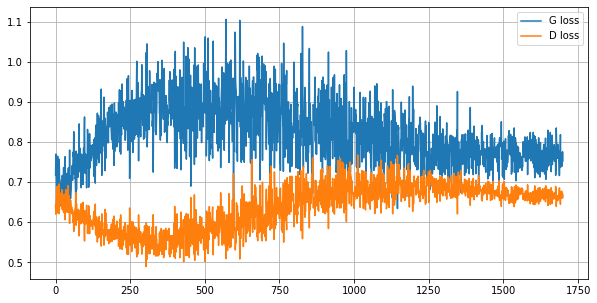

In [9]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), accumulated_gloss, label="G loss")
plt.plot(range(epochs), accumulated_dloss, label="D loss")
plt.legend()
plt.grid();

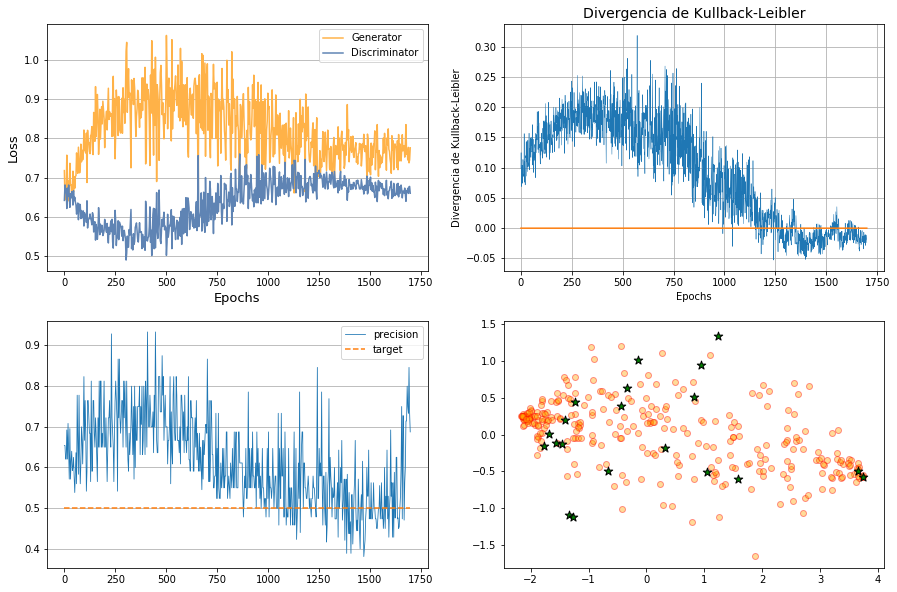

In [10]:
r = gan_utils.plot_results(syn_size=300);

In [11]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

precision, kld, loss_g, loss_d, s_metric =  gan_utils.get_metrics(num_iter=200)
[pl, pq1, pq2, pq3, pu], pouts = bokeh_utils.boxtplot_values(np.array(precision), True, True)
[kl, kq1, kq2, kq3, ku], kouts = bokeh_utils.boxtplot_values(np.array(kld), True, True)
[gl, gq1, gq2, gq3, gu], gouts = bokeh_utils.boxtplot_values(np.array(loss_g), True, True)
[dl, dq1, dq2, dq3, du], douts = bokeh_utils.boxtplot_values(np.array(loss_d), True, True)

In [12]:
cats = ["precision", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl, kl, gl, dl], width=.2, height=.001, line_color="black")
p.segment(cats, [pl, kl, gl, dl], cats, [pq1, kq1, gq1, dq1], line_color="black")
p.vbar(cats, width=.4, top=[pq2, kq2, gq2, dq2], bottom=[pq1, kq1, gq1, dq1], fill_color="#3B8686",
       line_color="black")
p.vbar(cats, width=.4, top=[pq3, kq3, gq3, dq3], bottom=[pq2, kq2, gq2, dq2], fill_color="#E08E79",
      line_color="black")
p.segment(cats, [pq3, kq3, gq3, dq3], cats, [pu, ku, gu, du], line_color="black")
p.rect(cats, [pu, ku, gu, du], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts, kouts, gouts, douts]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

### The baseline architecture is the architecture used to qualify

In [14]:
noise_shape = 50
num_syn_samples = 3

### architecture #1

In [9]:
#Generator network
G1 = Sequential()
G1.add(Dense(50, input_shape=(noise_shape,)))
G1.add(Dense(150))
G1.add(Dropout(.15))
G1.add(Dense(9, activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G1(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[ 0.03038622,  0.08513978,  0.06898009,  0.00014494,  0.07690827,
         0.0186052 ,  0.00873168,  0.11149421, -0.03986414],
       [ 0.01623422, -0.03965067, -0.05644915,  0.01990701,  0.01323565,
        -0.03779475, -0.01214732, -0.0082667 , -0.06084727],
       [ 0.03542356, -0.01752173, -0.00590795, -0.0262498 , -0.03879754,
        -0.03172226, -0.03571924, -0.06016515, -0.01193956]])>

In [10]:
#Discriminator network
D1 = Sequential()
D1.add(Dense(32, input_shape=(rg_data.shape[1],)))
D1.add(tf.keras.layers.LeakyReLU(alpha=.2))
D1.add(Dense(32))
D1.add(Dense(1, activation="sigmoid"))
print("output of the disriminator network:")
D1(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.51438731],
       [0.5050952 ],
       [0.5008045 ]])>

In [11]:
rg_data.shape

(20, 9)

In [12]:
num_iterations = 20
epochs = 1700
precision1, kld1, loss_g1, loss_d1, s_metric_1 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D1.get_weights():
        init_weights.append(init(w.shape))
    D1.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G1.get_weights():
        init_weights.append(init(w.shape))
    G1.set_weights(init_weights)    
    
    gan_utils1 = EdwinRueda_utils.gan_utils()
    optimizerG1 = tf.optimizers.SGD(lr=.00015, momentum=.92, decay=.00015/epochs)
    optimizerD1 = tf.optimizers.SGD(lr=.001, momentum=.9, decay=.001/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils1.train(rg_data, G1, D1, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG1, optimizerD=optimizerD1,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils1.get_metrics(num_iter=50)
    precision1.append(np.mean(precision))
    kld1.append(np.mean(kld))
    loss_g1.append(np.mean(loss_g))
    loss_d1.append(np.mean(loss_d))
    s_metric_1.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

iteration: 0, time: 18.04907512664795 [s]
iteration: 1, time: 15.8971586227417 [s]
iteration: 2, time: 15.604746580123901 [s]
iteration: 3, time: 15.71039628982544 [s]
iteration: 4, time: 15.722897052764893 [s]


/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 5, time: 15.681175708770752 [s]
iteration: 6, time: 15.658062219619751 [s]
iteration: 7, time: 15.64082407951355 [s]
iteration: 8, time: 15.674503087997437 [s]
iteration: 9, time: 15.797710418701172 [s]
iteration: 10, time: 15.799226999282837 [s]
iteration: 11, time: 15.688220500946045 [s]
iteration: 12, time: 15.81731390953064 [s]
iteration: 13, time: 15.806249856948853 [s]
iteration: 14, time: 15.861558198928833 [s]
iteration: 15, time: 15.668980360031128 [s]
iteration: 16, time: 15.780694246292114 [s]
iteration: 17, time: 15.638131141662598 [s]
iteration: 18, time: 15.684101343154907 [s]
iteration: 19, time: 15.624942541122437 [s]


### Metric to select the best GAN architecture
$$ S(x, x')=\sum_{i}^{m}\sum_{j}^{n_g}\sum_{k}^{n_f}\frac{\vert x_{i}^{(k)}- x_{j}^{'(k)}\vert}{n_f n_g m} + \frac{\beta}{n_g}\sum_{l}^{n_g}{(\hat{y}- 0.5})^2$$
- where $\beta$ is a parameter of adjustments

In [13]:
bokeh_utils = EdwinRueda_utils.bokeh_utils()

[pl_1, pq1_1, pq2_1, pq3_1, pu_1], pouts_1 = bokeh_utils.boxtplot_values(np.array(precision1), True, True)
[kl_1, kq1_1, kq2_1, kq3_1, ku_1], kouts_1 = bokeh_utils.boxtplot_values(np.array(kld1), True, True)
[gl_1, gq1_1, gq2_1, gq3_1, gu_1], gouts_1 = bokeh_utils.boxtplot_values(np.array(loss_g1), True, True)
[dl_1, dq1_1, dq2_1, dq3_1, du_1], douts_1 = bokeh_utils.boxtplot_values(np.array(loss_d1), True, True)
[sl_1, sq1_1, sq2_1, sq3_1, su_1], souts_1 = bokeh_utils.boxtplot_values(np.array(s_metric), True, True)

In [14]:
cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_1, sl_1, kl_1, gl_1, dl_1], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_1, sl_1, kl_1, gl_1, dl_1], cats, [pq1_1, sq1_1, kq1_1, gq1_1, dq1_1], line_color="black")
p.vbar(cats, width=.4, top=[pq2_1, sq2_1, kq2_1, gq2_1, dq2_1], bottom=[pq1_1, sq1_1, kq1_1, gq1_1, dq1_1],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_1, sq3_1, kq3_1, gq3_1, dq3_1], bottom=[pq2_1, sq2_1, kq2_1, gq2_1, dq2_1],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_1, sq3_1, kq3_1, gq3_1, dq3_1], cats, [pu_1, su_1, ku_1, gu_1, du_1], line_color="black")
p.rect(cats, [pu_1, su_1, ku_1, gu_1, du_1], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_1, souts_1, kouts_1, gouts_1, douts_1]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [15]:
np.save(file="./results/selecting_gan/precision_1.npy", arr=np.array(precision1))
np.save(file="./results/selecting_gan/kld_1.npy", arr=np.array(kld1))
np.save(file="./results/selecting_gan/loss_g_1.npy", arr=np.array(loss_g1))
np.save(file="./results/selecting_gan/loss_d_1.npy", arr=np.array(loss_d1))
np.save(file="./results/selecting_gan/s_metric_1.npy", arr=np.array(s_metric))

### architecture #2

In [16]:
#Generator network
G2 = Sequential()
G2.add(Dense(noise_shape, input_shape=(noise_shape,)))
G2.add(Dropout(.1))
G2.add(Dense(70))
G2.add(Dropout(.15))
G2.add(Dense(20))
G2.add(Dense(rg_data.shape[1], activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G2(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[ 0.05711542, -0.02661044, -0.1682718 , -0.0873548 , -0.04845735,
        -0.01352016, -0.0870964 , -0.03059929,  0.05163405],
       [ 0.03777202, -0.00296685,  0.05756938,  0.10018976, -0.01138297,
        -0.00856491,  0.05843524, -0.04515325,  0.01610639],
       [ 0.03040189, -0.08766464, -0.0951632 , -0.1419574 , -0.06496361,
         0.04387355, -0.07530434,  0.0220475 ,  0.12468035]])>

In [17]:
D2 = Sequential()
D2.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],)))
D2.add(Dense(9, activation="relu"))
D2.add(Dense(30, activation="relu"))
D2.add(Dense(9, activation="relu"))
D2.add(Dense(1, activation="sigmoid"))

print("output of the disriminator network:")
D2(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.50079869],
       [0.50219833],
       [0.49961546]])>

In [19]:
num_iterations = 20
epochs = 1700
precision2, kld2, loss_g2, loss_d2, s_metric_2 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D2.get_weights():
        init_weights.append(init(w.shape))
    D2.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G2.get_weights():
        init_weights.append(init(w.shape))
    G2.set_weights(init_weights)    
    
    gan_utils2 = EdwinRueda_utils.gan_utils()
    optimizerG2 = tf.optimizers.SGD(lr=.00015, momentum=.92, decay=.00015/epochs)
    optimizerD2 = tf.optimizers.SGD(lr=.001, momentum=.9, decay=.001/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils2.train(rg_data, G2, D2, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG2, optimizerD=optimizerD2,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils2.get_metrics(num_iter=50)
    precision2.append(np.mean(precision))
    kld2.append(np.mean(kld))
    loss_g2.append(np.mean(loss_g))
    loss_d2.append(np.mean(loss_d))
    s_metric_2.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

iteration: 0, time: 16.804389476776123 [s]
iteration: 1, time: 16.772156238555908 [s]
iteration: 2, time: 16.909545183181763 [s]
iteration: 3, time: 16.808330059051514 [s]
iteration: 4, time: 16.84886360168457 [s]
iteration: 5, time: 16.784385681152344 [s]
iteration: 6, time: 17.01539945602417 [s]
iteration: 7, time: 16.78326940536499 [s]
iteration: 8, time: 16.993587970733643 [s]
iteration: 9, time: 16.837114334106445 [s]
iteration: 10, time: 16.871949434280396 [s]
iteration: 11, time: 16.80340051651001 [s]
iteration: 12, time: 16.76938223838806 [s]
iteration: 13, time: 17.260124921798706 [s]
iteration: 14, time: 16.967719078063965 [s]
iteration: 15, time: 16.902507305145264 [s]
iteration: 16, time: 16.969659090042114 [s]
iteration: 17, time: 16.891356945037842 [s]
iteration: 18, time: 16.805506706237793 [s]
iteration: 19, time: 17.146531105041504 [s]


In [22]:
[pl_2, pq1_2, pq2_2, pq3_2, pu_2], pouts_2 = bokeh_utils.boxtplot_values(np.array(precision2), True, True)
[kl_2, kq1_2, kq2_2, kq3_2, ku_2], kouts_2 = bokeh_utils.boxtplot_values(np.array(kld2), True, True)
[gl_2, gq1_2, gq2_2, gq3_2, gu_2], gouts_2 = bokeh_utils.boxtplot_values(np.array(loss_g2), True, True)
[dl_2, dq1_2, dq2_2, dq3_2, du_2], douts_2 = bokeh_utils.boxtplot_values(np.array(loss_d2), True, True)
[sl_2, sq1_2, sq2_2, sq3_2, su_2], souts_2 = bokeh_utils.boxtplot_values(np.array(s_metric_2), True, True)

cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_2, sl_2, kl_2, gl_2, dl_2], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_2, sl_2, kl_2, gl_2, dl_2], cats, [pq1_2, sq1_2, kq1_2, gq1_2, dq1_2], line_color="black")
p.vbar(cats, width=.4, top=[pq2_2, sq2_2, kq2_2, gq2_2, dq2_2], bottom=[pq1_2, sq1_2, kq1_2, gq1_2, dq1_2],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_2, sq3_2, kq3_2, gq3_2, dq3_2], bottom=[pq2_2, sq2_2, kq2_2, gq2_2, dq2_2],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_2, sq3_2, kq3_2, gq3_2, dq3_2], cats, [pu_2, su_2, ku_2, gu_2, du_2], line_color="black")
p.rect(cats, [pu_2, su_2, ku_2, gu_2, du_2], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_2, souts_2, kouts_2, gouts_2, douts_2]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [23]:
np.save(file="./results/selecting_gan/precision_2.npy", arr=np.array(precision2))
np.save(file="./results/selecting_gan/kld_2.npy", arr=np.array(kld2))
np.save(file="./results/selecting_gan/loss_g_2.npy", arr=np.array(loss_g2))
np.save(file="./results/selecting_gan/loss_d_2.npy", arr=np.array(loss_d2))
np.save(file="./results/selecting_gan/s_metric_2.npy", arr=np.array(s_metric_2))

### architecture #3

In [193]:
#generator network
G3 = Sequential()
G3.add(Dense(noise_shape, input_shape=(noise_shape,), activation="tanh"))
G3.add(Dropout(.1))
G3.add(Dense(50))
G3.add(Dropout(.1))
G3.add(Dense(rg_data.shape[1], activation="tanh"))

#synthetic sample
noise_input = tf.random_normal_initializer()((num_syn_samples, noise_shape))
print("noise input shape:", noise_input.shape)
print("---------------------------")
print("synthetic samples:")
synthetic_samples = G3(noise_input)
synthetic_samples

noise input shape: (3, 50)
---------------------------
synthetic samples:


<tf.Tensor: shape=(3, 9), dtype=float64, numpy=
array([[ 0.08127095,  0.04000465,  0.04949291, -0.06275957,  0.08342461,
        -0.07292553, -0.03450661, -0.02402011,  0.06808231],
       [-0.00727468, -0.02707239,  0.01110887, -0.01667897, -0.05973529,
        -0.05673557, -0.01540139,  0.01754324, -0.01140425],
       [ 0.02385395, -0.03984566,  0.05678405, -0.02357955, -0.00565487,
         0.00776995, -0.05874701, -0.05046204, -0.01477143]])>

In [194]:
#discriminator networks
D3 = Sequential()
D3.add(Dense(rg_data.shape[1], input_shape=(rg_data.shape[1],), activation="tanh"))
D3.add(tf.keras.layers.LeakyReLU(.2))
D3.add(Dense(16))
D3.add(tf.keras.layers.LeakyReLU(.2))
D3.add(Dense(8))
D3.add(Dense(1, activation="sigmoid"))

print("output of the disriminator network:")
D3(synthetic_samples)

output of the disriminator network:


<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.50775137],
       [0.50049887],
       [0.49704428]])>

In [195]:
gan_utils3 = EdwinRueda_utils.gan_utils()
optimizerG3 = tf.optimizers.SGD(lr=.00013, momentum=.95, decay=.00013/epochs)
optimizerD3 = tf.optimizers.SGD(lr=.001, momentum=.92, decay=.001/epochs)
accumulated_gloss, accumulated_dloss = gan_utils3.train(rg_data, G3, D3, noise_input=noise_shape,
                                                   epochs=epochs, batch_size=rg_data.shape[0],
                                                   optimizerG=optimizerG3, optimizerD=optimizerD3,
                                                   verbose=False)

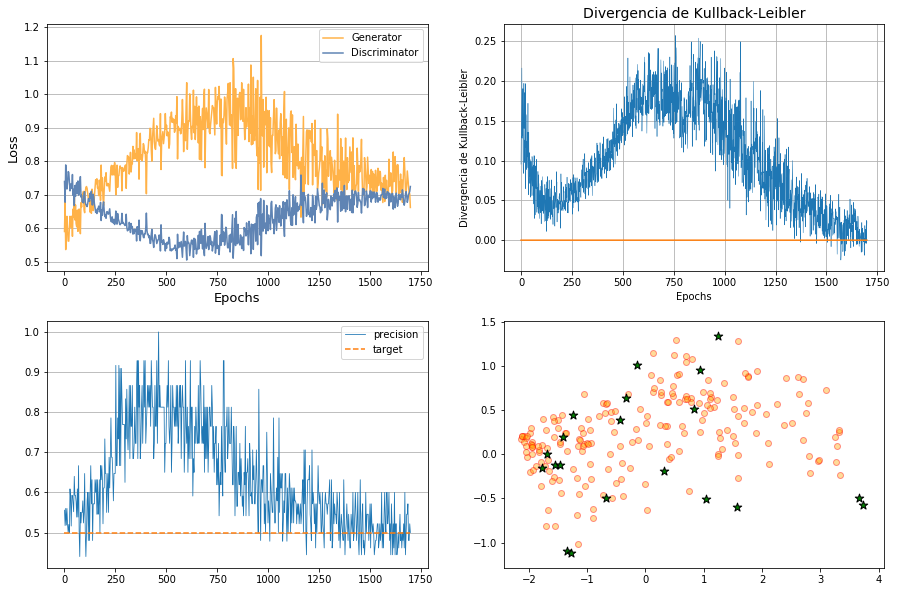

In [196]:
f = gan_utils3.plot_results(200)

In [197]:
num_iterations = 20
epochs = 1700
precision3, kld3, loss_g3, loss_d3, s_metric_3 = [], [], [], [], []
train_times = []
for i in range(num_iterations):
    tic = time()
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in D3.get_weights():
        init_weights.append(init(w.shape))
    D3.set_weights(init_weights)
    
    init = tf.keras.initializers.glorot_uniform()
    init_weights = []
    for w in G3.get_weights():
        init_weights.append(init(w.shape))
    G3.set_weights(init_weights)    
    
    gan_utils3 = EdwinRueda_utils.gan_utils()
    optimizerG3 = tf.optimizers.SGD(lr=.00013, momentum=.95, decay=.00013/epochs)
    optimizerD3 = tf.optimizers.SGD(lr=.001, momentum=.92, decay=.001/epochs)
    accumulated_gloss, accumulated_dloss = gan_utils3.train(rg_data, G3, D3, noise_input=noise_shape,
                                                       epochs=epochs, batch_size=rg_data.shape[0],
                                                       optimizerG=optimizerG3, optimizerD=optimizerD3,
                                                       verbose=False)
    precision, kld, loss_g, loss_d, s_metric =  gan_utils3.get_metrics(num_iter=50)
    precision3.append(np.mean(precision))
    kld3.append(np.mean(kld))
    loss_g3.append(np.mean(loss_g))
    loss_d3.append(np.mean(loss_d))
    s_metric_3.append(np.mean(s_metric))
    toc = time()
    train_times.append(toc-tic)
    print("iteration: {}, time: {} [s]".format(i, toc-tic))

/home/edwin/.local/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


iteration: 0, time: 23.299023628234863 [s]
iteration: 1, time: 22.208231210708618 [s]
iteration: 2, time: 21.655885934829712 [s]
iteration: 3, time: 21.451436042785645 [s]
iteration: 4, time: 21.367311477661133 [s]
iteration: 5, time: 21.359501600265503 [s]
iteration: 6, time: 21.327213764190674 [s]
iteration: 7, time: 21.290137767791748 [s]
iteration: 8, time: 21.38961148262024 [s]
iteration: 9, time: 21.561943292617798 [s]
iteration: 10, time: 21.276702404022217 [s]
iteration: 11, time: 21.41664481163025 [s]
iteration: 12, time: 21.59439444541931 [s]
iteration: 13, time: 22.188952684402466 [s]
iteration: 14, time: 21.108493089675903 [s]
iteration: 15, time: 21.922096967697144 [s]
iteration: 16, time: 26.1437566280365 [s]
iteration: 17, time: 25.320411920547485 [s]
iteration: 18, time: 25.294211626052856 [s]
iteration: 19, time: 26.219351291656494 [s]


In [198]:
[pl_3, pq1_3, pq2_3, pq3_3, pu_3], pouts_3 = bokeh_utils.boxtplot_values(np.array(precision3), True, True)
[kl_3, kq1_3, kq2_3, kq3_3, ku_3], kouts_3 = bokeh_utils.boxtplot_values(np.array(kld3), True, True)
[gl_3, gq1_3, gq2_3, gq3_3, gu_3], gouts_3 = bokeh_utils.boxtplot_values(np.array(loss_g3), True, True)
[dl_3, dq1_3, dq2_3, dq3_3, du_3], douts_3 = bokeh_utils.boxtplot_values(np.array(loss_d3), True, True)
[sl_3, sq1_3, sq2_3, sq3_3, su_3], souts_3 = bokeh_utils.boxtplot_values(np.array(s_metric_3), True, True)

cats = ["precision","s_metric", "KLD", "loss_G", "loss_D"]
p = figure(plot_height=200, plot_width=350, x_range=cats, background_fill_color="#E8E8E8",)
p.rect(cats, [pl_3, sl_3, kl_3, gl_3, dl_3], width=.2, height=.001, line_color="black")
p.segment(cats, [pl_3, sl_3, kl_3, gl_3, dl_3], cats, [pq1_3, sq1_3, kq1_3, gq1_3, dq1_3], line_color="black")
p.vbar(cats, width=.4, top=[pq2_3, sq2_3, kq2_3, gq2_3, dq2_3], bottom=[pq1_3, sq1_3, kq1_3, gq1_3, dq1_3],
       fill_color="#3B8686", line_color="black")
p.vbar(cats, width=.4, top=[pq3_3, sq3_3, kq3_3, gq3_3, dq3_3], bottom=[pq2_3, sq2_3, kq2_3, gq2_3, dq2_3],
       fill_color="#E08E79", line_color="black")
p.segment(cats, [pq3_3, sq3_3, kq3_3, gq3_3, dq3_3], cats, [pu_3, su_3, ku_3, gu_3, du_3], line_color="black")
p.rect(cats, [pu_3, su_3, ku_3, gu_3, du_3], width=.2, height=.001, line_color="black")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = "white"
p.grid.grid_line_width = 1
p.yaxis.ticker = np.arange(0,1.1,.1)

#outliers
list_outs = [pouts_3, souts_3, kouts_3, gouts_3, douts_3]
for idx in range(len(cats)):
    aux_var = list_outs[idx]
    if len(aux_var)>0:
        p.circle([cats[idx] for i in range(len(aux_var))], aux_var, line_color="#FF8000",
                fill_color="#FFA851", size=4)
    
show(p)

In [199]:
np.save(file="./results/selecting_gan/precision_3.npy", arr=np.array(precision3))
np.save(file="./results/selecting_gan/kld_3.npy", arr=np.array(kld3))
np.save(file="./results/selecting_gan/loss_g_3.npy", arr=np.array(loss_g3))
np.save(file="./results/selecting_gan/loss_d_3.npy", arr=np.array(loss_d3))
np.save(file="./results/selecting_gan/s_metric_3.npy", arr=np.array(s_metric_3))